## 1. Data Processing

In [1]:
#importing required libraries
import pandas as pd
import missingno as msno 
import numpy as np
import imblearn
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 
from sklearn import metrics 
from sklearn.metrics import roc_curve

In [2]:
#read the data
data= pd.read_csv("D:/7150CEM/Data/FinalData/ThirdYear.csv")
#Dropping target feature
data1 = data.drop('class',axis=1)
y = data['class']
#data visualization
data1.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
0,0.174190,0.41299,0.14371,1.3480,-28.9820,0.60383,0.219460,1.1225,1.1961,0.46359,...,127000.0,0.163960,0.375740,0.83604,0.000007,9.7145,6.2813,84.291,4.3303,4.0341
1,0.146240,0.46038,0.28230,1.6294,2.5952,0.00000,0.171850,1.1721,1.6018,0.53962,...,3387.8,0.027516,0.271000,0.90108,0.000000,5.9882,4.1103,102.190,3.5716,5.9500
2,0.000595,0.22612,0.48839,3.1599,84.8740,0.19114,0.004572,2.9881,1.0077,0.67566,...,20453.0,0.007639,0.000881,0.99236,0.000000,6.7742,3.7922,64.846,5.6287,4.4581
3,0.024526,0.43236,0.27546,1.7833,-10.1050,0.56944,0.024526,1.3057,1.0509,0.56453,...,5012.6,0.048398,0.043445,0.95160,0.142980,4.2286,5.0528,98.783,3.6950,3.4844
4,0.188290,0.41504,0.34231,1.9279,-58.2740,0.00000,0.233580,1.4094,1.3393,0.58496,...,13730.0,0.176480,0.321880,0.82635,0.073039,2.5912,7.0756,100.540,3.6303,4.6375


In [3]:
#looking for null values
data1.isnull().sum()


Attr1       0
Attr2       0
Attr3       0
Attr4      18
Attr5      25
         ... 
Attr60    592
Attr61     17
Attr62     43
Attr63     18
Attr64    228
Length: 64, dtype: int64

<Axes: >

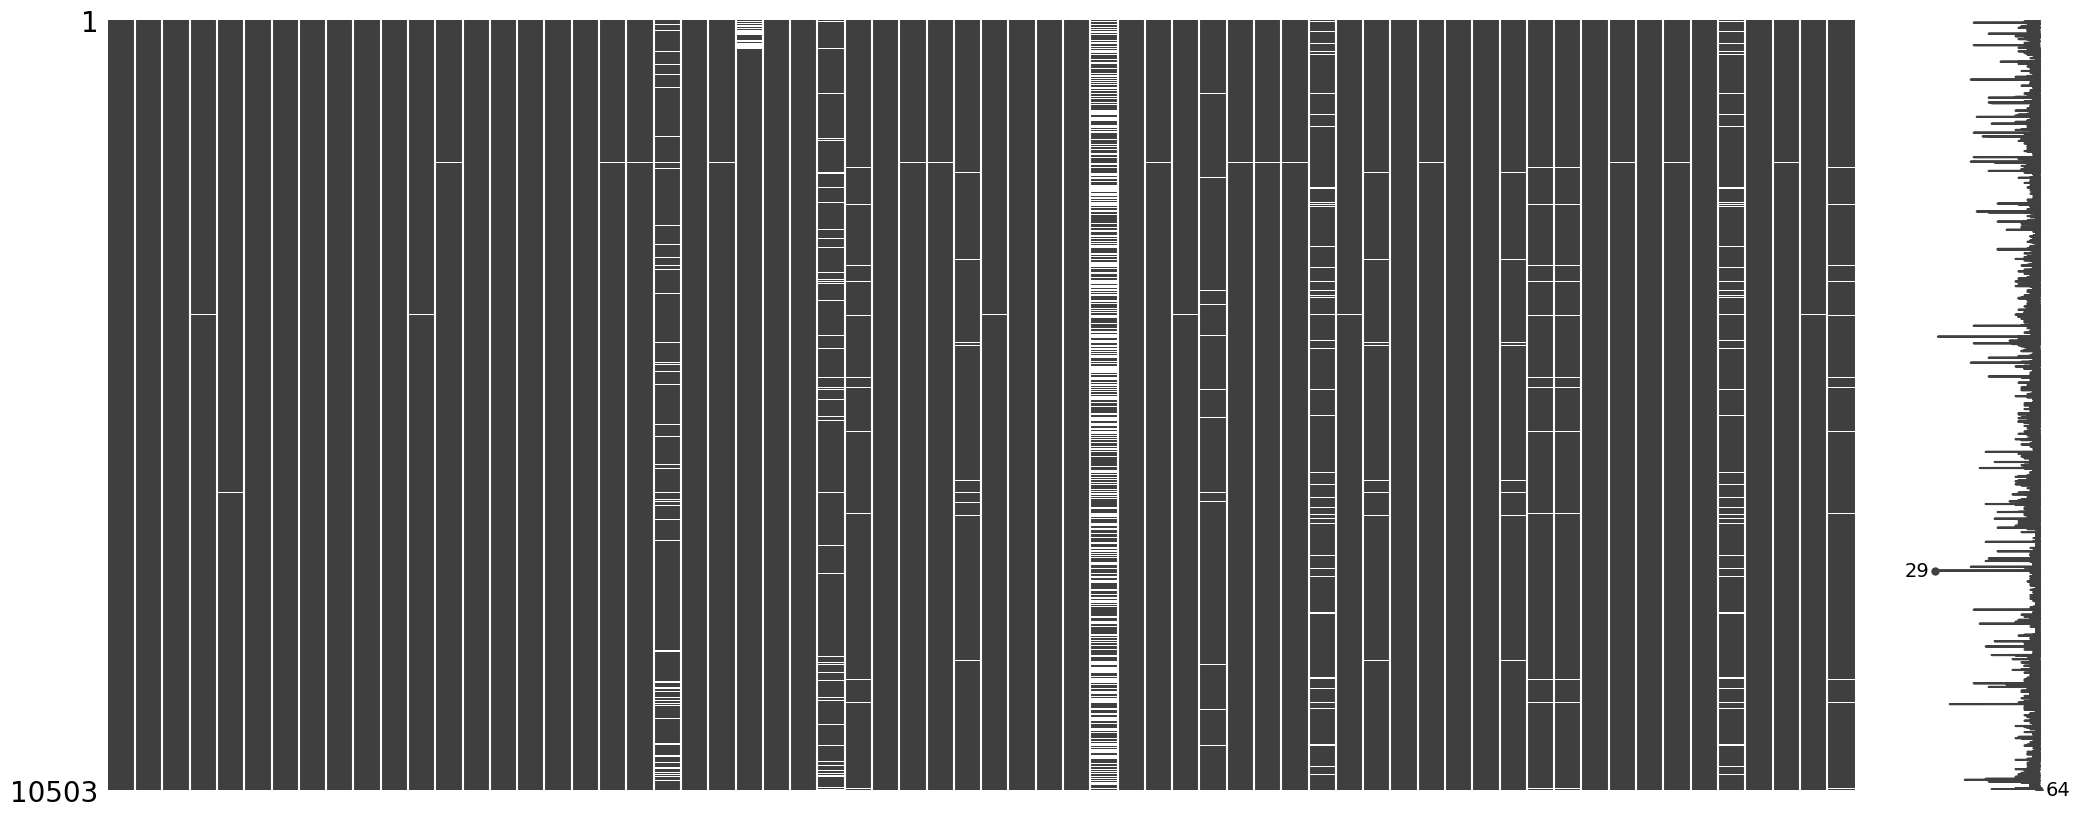

In [4]:
#Matrix for the Missing values
msno.matrix(data1)

In [5]:
#drop the null values
data_1st=data1.dropna()


In [6]:
#calculate data loss percentage
per_1st = ((len(data1)-len(data_1st))/len(data1))*100
print("percentage of data loss after removing the null values: ", per_1st)


percentage of data loss after removing the null values:  53.48947919642008


In [7]:
#rename column values
data1.columns=['ROA', 'TDTA', 'WCTA','CAAL','DIR','REL','EBIT','BV','ATR','ETA','GPEIFE','GPL','GPDS','GPI','LGPD','GPDL','TATL','GPA','Revenue','ITS','NS','OCFTA','NPS','GPA_3','ESTA','SR','POATFE','WCFA','FS','TLCS','GPIS','CLTCOGS','OPSL','OPTL','PSTA','ATR','CAIL','CCTA','PSS','CAIRSL','TLOAD','POAS','RRIT','RS','PI','CAISL','ICOGS','POADTA_EBITDA','POADS_EBITDA','CR','SLTA','SLCOGS','EFAR','CCFA','WC','SCOGSS','CAISL_SGPD','CSR','LLE','SI','STR','SLS','SSL','SFA']

## 2. Data Imputation
### 2.1 Simple Imputation with mean

In [8]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'mean')
data1 = pd.DataFrame(imputer.fit_transform(data1), columns=data1.columns)
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10503 entries, 0 to 10502
Data columns (total 64 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ROA            10503 non-null  float64
 1   TDTA           10503 non-null  float64
 2   WCTA           10503 non-null  float64
 3   CAAL           10503 non-null  float64
 4   DIR            10503 non-null  float64
 5   REL            10503 non-null  float64
 6   EBIT           10503 non-null  float64
 7   BV             10503 non-null  float64
 8   ATR            10503 non-null  float64
 9   ETA            10503 non-null  float64
 10  GPEIFE         10503 non-null  float64
 11  GPL            10503 non-null  float64
 12  GPDS           10503 non-null  float64
 13  GPI            10503 non-null  float64
 14  LGPD           10503 non-null  float64
 15  GPDL           10503 non-null  float64
 16  TATL           10503 non-null  float64
 17  GPA            10503 non-null  float64
 18  Revenu

## 3. Data Standardization

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Splitting the data into 80-20 ratio
X_train,X_test,y_train,y_test= train_test_split(data1,y,test_size=0.2,random_state = 42)

scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## 4. Cheching for Data Imbalance

In [10]:
# target feature 'class' Count
class_0 = data[data['class'] == 0]
class_1 = data[data['class'] == 1]
#print the shape of the class variable
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (10008, 65)
class 1: (495, 65)


### 4.1 Data Balancing
#### SMOTE Oversampling

In [11]:
# import library
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')

# fit predictor and target variable
X_train, y_train = smote.fit_resample(X_train,y_train)

print('Original dataset shape', X_train)
print('Resample dataset shape', y_train)

Original dataset shape [[-0.05690614 -0.02158403  0.03682645 ... -0.00221471  0.00251541
  -0.07809196]
 [ 0.0015557  -0.04899822  0.03747204 ... -0.00141307 -0.09922465
  -0.0741788 ]
 [ 0.09879512 -0.0595072  -0.01607434 ... -0.00138096 -0.10175222
  -0.08128208]
 ...
 [ 0.43548226 -0.01958373  0.06367379 ... -0.00158512 -0.07320854
  -0.02585641]
 [-0.01182794  0.02022715 -0.01658955 ...  0.00181579 -0.1903294
  -0.06950591]
 [-0.04041616  0.00914265  0.02078597 ...  0.0016496  -0.19910922
  -0.06618389]]
Resample dataset shape 0        0
1        0
2        0
3        0
4        0
        ..
16023    1
16024    1
16025    1
16026    1
16027    1
Name: class, Length: 16028, dtype: int64


## 5. Feature Selection

### 5.1 PCA Analysis

variance expalined: [6.79425046e-01 1.37835887e-01 1.28530719e-01 7.63282280e-03
 7.52918260e-03 7.47733059e-03 6.36538941e-03 4.71131165e-03
 4.47247902e-03 3.82941305e-03 2.63544500e-03 2.18921106e-03
 1.44620531e-03 9.33355273e-04 8.91906151e-04 8.09341059e-04
 7.19997668e-04 5.63044744e-04 5.06523051e-04 3.91953041e-04
 2.47651716e-04 1.54787067e-04 1.45806469e-04 1.31647497e-04
 7.81344999e-05 6.02879498e-05 4.35018181e-05 4.00766971e-05
 3.82577987e-05 3.73676595e-05 3.29207973e-05 1.97334085e-05
 1.66584573e-05 1.42570906e-05 8.01013067e-06 6.77885556e-06
 5.78798325e-06 3.52775517e-06 3.06769328e-06 2.24011158e-06
 2.06069686e-06 1.96032625e-06 1.49589278e-06 1.46232341e-06
 1.23398060e-06 1.12832530e-06 9.06446060e-07 6.86959217e-07
 5.19607996e-07 5.04807849e-07 3.45465382e-07 1.78127707e-07
 1.23316290e-07 1.00910029e-07 9.10691864e-08 6.06312942e-08
 4.02507399e-08 2.18128278e-08 8.88328780e-09 2.82897967e-09
 1.95161667e-09 1.74501602e-10 8.01763841e-13 2.63976231e-33]
var

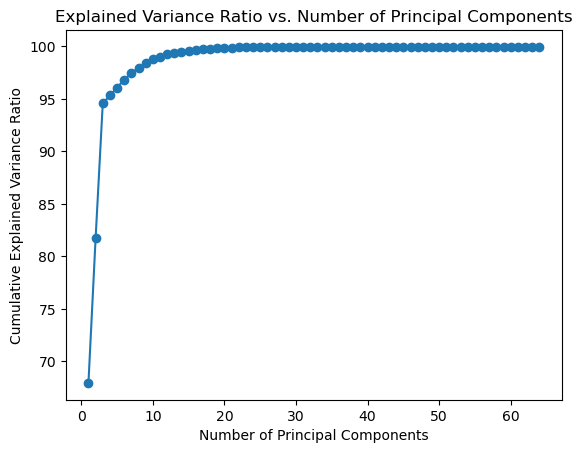

In [12]:
from sklearn.decomposition import PCA
# PCA Analysis for all components of train data
pca = PCA(n_components=64)
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)
explained_var_ratio = pca.explained_variance_ratio_
print("variance expalined:",explained_var_ratio)
cumulative_var_ratio = np.cumsum(np.round(explained_var_ratio,decimals=4)*100)
print("variance :", cumulative_var_ratio)

plt.plot(range(1, len(cumulative_var_ratio) + 1), cumulative_var_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Principal Components')
plt.show()

variance expalined: [6.79425046e-01 1.37835887e-01 1.28530719e-01 7.63282280e-03
 7.52918260e-03 7.47733059e-03 6.36538941e-03 4.71131165e-03
 4.47247902e-03 3.82941305e-03 2.63544500e-03 2.18921106e-03
 1.44620531e-03 9.33355273e-04 8.91906151e-04 8.09341059e-04
 7.19997668e-04 5.63044744e-04 5.06523051e-04 3.91953041e-04]
variance : [67.94 81.72 94.57 95.33 96.08 96.83 97.47 97.94 98.39 98.77 99.03 99.25
 99.39 99.48 99.57 99.65 99.72 99.78 99.83 99.87]


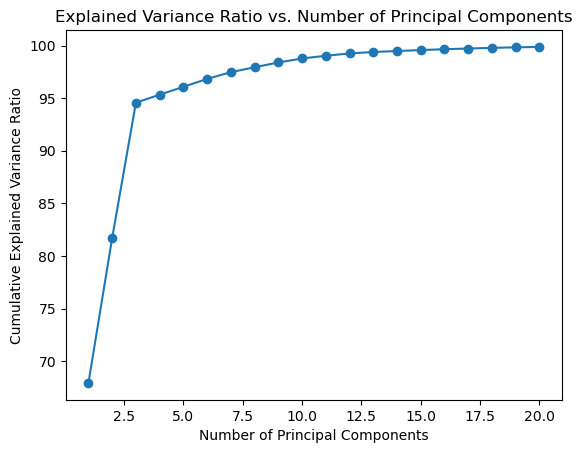

In [13]:
# PCA Analysis with 20 components of train data
pca = PCA(n_components=20)
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)
explained_var_ratio = pca.explained_variance_ratio_
print("variance expalined:",explained_var_ratio)
cumulative_var_ratio = np.cumsum(np.round(explained_var_ratio,decimals=4)*100)
print("variance :", cumulative_var_ratio)

plt.plot(range(1, len(cumulative_var_ratio) + 1), cumulative_var_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Principal Components')
plt.show()
 

## 6. Machine Learning Classifications

### 6.1 Logistic Regression

In [14]:
import sklearn.linear_model as lm 
from sklearn.linear_model import LogisticRegression
#logistic Regression
LR=lm.LogisticRegression() 
LR.fit(X_train,y_train) 
LR_pred= LR.predict(X_test) 
#train and test accuracy scores
trACC_LR=LR.score(X_train,y_train) 
tesACC_LR=LR.score(X_test,y_test) 
print('Train Accuracy for Logistic Regression : ',trACC_LR) 
print('Test Accuracy for Logistic Regression : ', tesACC_LR,"\n") #28.74


Train Accuracy for Logistic Regression :  0.629460943349139
Test Accuracy for Logistic Regression :  0.2874821513564969 



In [15]:
#Confusion matrix
LR_cf = confusion_matrix(y_test,LR_pred) 
print('confusion matrix for LR:\n',LR_cf)

#printingcclassification report of Confusion matrix 
LR_matrix = classification_report(y_test,LR_pred) 
print('Classification Report for LR:\n',LR_matrix) 

confusion matrix for LR:
 [[ 535 1459]
 [  38   69]]
Classification Report for LR:
               precision    recall  f1-score   support

           0       0.93      0.27      0.42      1994
           1       0.05      0.64      0.08       107

    accuracy                           0.29      2101
   macro avg       0.49      0.46      0.25      2101
weighted avg       0.89      0.29      0.40      2101



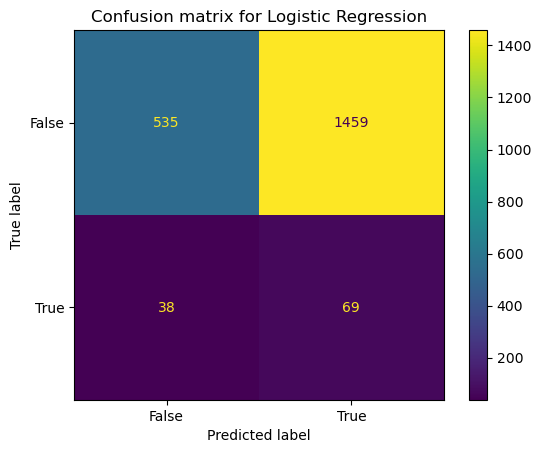

In [16]:
#plotting Confusion matrix  
LR_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = LR_cf,display_labels = [False,True]) 
LR_cm_display.plot() 
plt.title('Confusion matrix for Logistic Regression') 
plt.show()

### 6.2 Decision Tree

In [17]:
from sklearn.tree import DecisionTreeClassifier
#Decision tree classifier
DT= DecisionTreeClassifier()
DT.fit(X_train, y_train) 
DT_pred = DT.predict(X_test)
#train and test accuracies
trACC_DT=DT.score(X_train,y_train) 
tesACC_DT=DT.score(X_test,y_test) 
print('Train Accuracy for Decision Tree  : ',trACC_DT) 
print('Test Accuracy for Decision Tree : ', tesACC_DT,"\n") #78.96


Train Accuracy for Decision Tree  :  1.0
Test Accuracy for Decision Tree :  0.7896239885768681 



In [18]:
#Confusion Matrix
DT_cf = confusion_matrix(y_test,DT_pred) 
print('confusion matrix for DT:\n',DT_cf) 

#Classification report of Confusion matrix 
DT_matrix = classification_report(y_test,DT_pred) 
print('Classification Report for DT:\n',DT_matrix) 


confusion matrix for DT:
 [[1643  351]
 [  91   16]]
Classification Report for DT:
               precision    recall  f1-score   support

           0       0.95      0.82      0.88      1994
           1       0.04      0.15      0.07       107

    accuracy                           0.79      2101
   macro avg       0.50      0.49      0.47      2101
weighted avg       0.90      0.79      0.84      2101



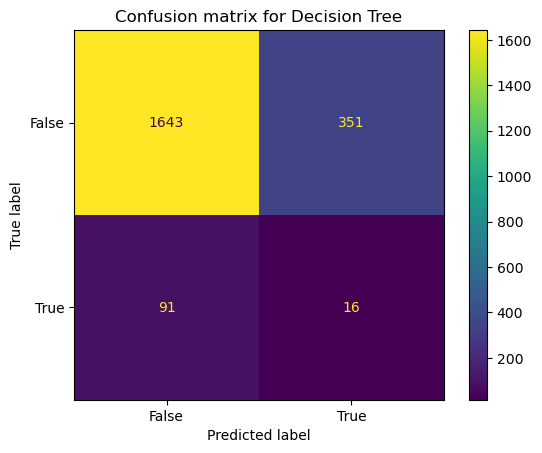

In [19]:
#plotting Confusion matrix  
DT_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = DT_cf,display_labels = [False,True]) 
DT_cm_display.plot() 
plt.title('Confusion matrix for Decision Tree') 
plt.show()

### 6.4 Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier
#Random Forest
RF= RandomForestClassifier(n_estimators=100)
RF.fit(X_train, y_train) 
RF_pred = RF.predict(X_test)
#train and test accuracies
trACC_RF=RF.score(X_train,y_train) 
tesACC_RF=RF.score(X_test,y_test) 
print('Train Accuracy for Random Forest  : ',trACC_RF) 
print('Test Accuracy for Random Forest : ', tesACC_RF,"\n") #94.57


Train Accuracy for Random Forest  :  1.0
Test Accuracy for Random Forest :  0.9457401237505949 



In [21]:
#Confusion Matrix
RF_cf = confusion_matrix(y_test,RF_pred) 
print('confusion matrix for RF:\n',RF_cf) 

#Classification report of confusion matrix 
RF_matrix = classification_report(y_test,RF_pred) 
print('Classification Report for RF:\n',RF_matrix) 


confusion matrix for RF:
 [[1987    7]
 [ 107    0]]
Classification Report for RF:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      1994
           1       0.00      0.00      0.00       107

    accuracy                           0.95      2101
   macro avg       0.47      0.50      0.49      2101
weighted avg       0.90      0.95      0.92      2101



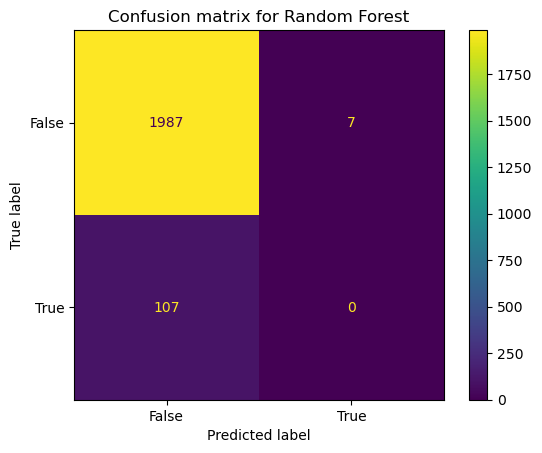

In [22]:
#plotting Confusion matrix  
RF_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = RF_cf,display_labels = [False,True]) 
RF_cm_display.plot() 
plt.title('Confusion matrix for Random Forest') 
plt.show()

### 6.4 Gradient Boosting Classifier

In [23]:
from sklearn.ensemble import GradientBoostingClassifier
#Gradient Boosting Classifier
GB = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
GB.fit(X_train, y_train)
GB_pred = GB.predict(X_test)
#train and test accuracies
trACC_GB=GB.score(X_train,y_train) 
tesACC_GB=GB.score(X_test,y_test) 
print('Train Accuracy for Gradient Boost  : ',trACC_GB) 
print('Test Accuracy for Gradient Boost : ', tesACC_GB,"\n") #49.9


Train Accuracy for Gradient Boost  :  0.755927127526828
Test Accuracy for Gradient Boost :  0.4997620180866254 



In [24]:
#Confusion Matrix
GB_cf = confusion_matrix(y_test,GB_pred) 
print('confusion matrix for GB:\n',GB_cf) 

#Classification report of Confusion matrix
GB_matrix = classification_report(y_test,GB_pred) 
print('Classification Report for GB:\n',GB_matrix) 


confusion matrix for GB:
 [[1001  993]
 [  58   49]]
Classification Report for GB:
               precision    recall  f1-score   support

           0       0.95      0.50      0.66      1994
           1       0.05      0.46      0.09       107

    accuracy                           0.50      2101
   macro avg       0.50      0.48      0.37      2101
weighted avg       0.90      0.50      0.63      2101



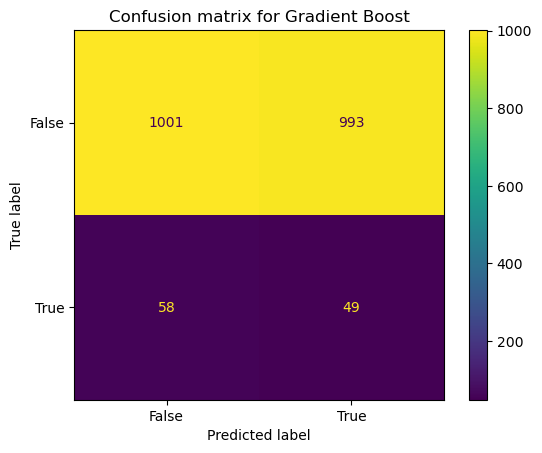

In [25]:
#plotting Confusion matrix  
GB_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = GB_cf,display_labels = [False,True]) 
GB_cm_display.plot() 
plt.title('Confusion matrix for Gradient Boost') 
plt.show()

### 6.5 Extreme Gradient Boosting Classifier (XGBoosting)

In [26]:
import xgboost as xgb
# Train a XGB model using the scikit-learn API
XGB = xgb.XGBClassifier(n_estimators=100, objective='binary:logistic', tree_method='hist', eta=0.1, max_depth=3, enable_categorical=True)
XGB.fit(X_train, y_train)
XGB_pred = XGB.predict(X_test)
#train and test Accuracies
trACC_XGB=XGB.score(X_train,y_train) 
tesACC_XGB=XGB.score(X_test,y_test) 
print('Train Accuracy for Xtreme Gradient Boost  : ',trACC_XGB) 
print('Test Accuracy for Xtreme Gradient Boost : ', tesACC_XGB,"\n") #50.26


Train Accuracy for Xtreme Gradient Boost  :  0.820439231345146
Test Accuracy for Xtreme Gradient Boost :  0.5026178010471204 



In [27]:
#Confusion Matrix
XGB_cf = confusion_matrix(y_test,XGB_pred) 
print('confusion matrix for XGB:\n',XGB_cf) 

#Classification report of Confusion matrix 
XGB_matrix = classification_report(y_test,XGB_pred) 
print('Classification Report for XGB:\n',XGB_matrix)


confusion matrix for XGB:
 [[ 985 1009]
 [  36   71]]
Classification Report for XGB:
               precision    recall  f1-score   support

           0       0.96      0.49      0.65      1994
           1       0.07      0.66      0.12       107

    accuracy                           0.50      2101
   macro avg       0.52      0.58      0.39      2101
weighted avg       0.92      0.50      0.63      2101



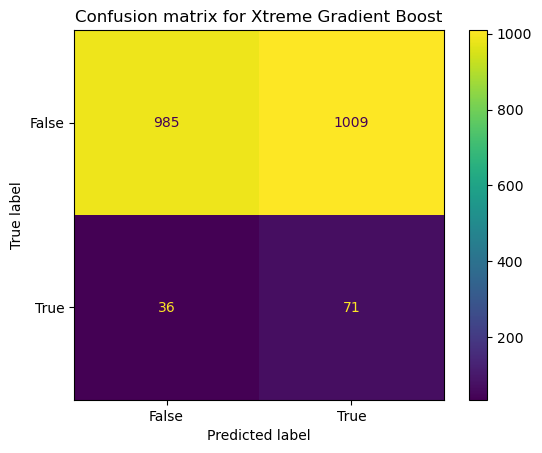

In [28]:
#plotting Confusion matrix  
XGB_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = XGB_cf,display_labels = [False,True]) 
XGB_cm_display.plot() 
plt.title('Confusion matrix for Xtreme Gradient Boost') 
plt.show()

### 6.6 Support Vector Machine (SVM)

In [29]:
from sklearn.svm import SVC
#Support Vector Machine
svc = SVC(probability=True)
svc.fit(X_train,y_train)
svc_pred = svc.predict(X_test)
#train and test Accuracies
trACC_svc=svc.score(X_train,y_train) 
tesACC_svc=svc.score(X_test,y_test) 
print('Train Accuracy for SVM  : ',trACC_svc) 
print('Test Accuracy for SVM : ', tesACC_svc,"\n") #21.13


Train Accuracy for SVM  :  0.6687047666583479
Test Accuracy for SVM :  0.21132793907663017 



In [30]:
#Confusion Matrix
svc_cf = confusion_matrix(y_test,svc_pred) 
print('confusion matrix for SVM:\n',svc_cf) 

#Classification report of Confusion matrix metrics 
svc_matrix = classification_report(y_test,svc_pred) 
print('Classification Report for SVM:\n',svc_matrix)

confusion matrix for SVM:
 [[ 359 1635]
 [  22   85]]
Classification Report for SVM:
               precision    recall  f1-score   support

           0       0.94      0.18      0.30      1994
           1       0.05      0.79      0.09       107

    accuracy                           0.21      2101
   macro avg       0.50      0.49      0.20      2101
weighted avg       0.90      0.21      0.29      2101



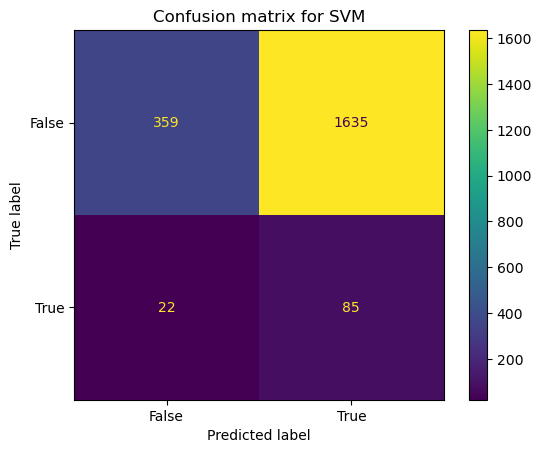

In [31]:
#plotting Confusion matrix  
svc_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = svc_cf,display_labels = [False,True]) 
svc_cm_display.plot() 
plt.title('Confusion matrix for SVM') 
plt.show()

## 7. ROC Curve

In [32]:
# ROC curve for Decision Tree 
DT_pred_prob = DT.predict_proba(X_test) 
DT_pred_prob = DT_pred_prob[:,1] 
DT_fpr,DT_tpr,_=roc_curve(y_test,DT_pred_prob) 

# ROC for Logistic regression 
LR_pred_prob = LR.predict_proba(X_test) 
LR_pred_prob = LR_pred_prob[:,1] 
LR_fpr,LR_tpr,_=roc_curve(y_test,LR_pred_prob) 

#ROC for Random Forest
RF_pred_prob = RF.predict_proba(X_test)
RF_pred_prob = RF_pred_prob[:,1]
RF_fpr,RF_tpr,_=roc_curve(y_test,RF_pred_prob)

#ROC curve for GB
GB_pred_prob = GB.predict_proba(X_test)
GB_pred_prob = GB_pred_prob[:,1]
GB_fpr,GB_tpr,_=roc_curve(y_test,GB_pred_prob)

#ROC curve for XGB
XGB_pred_prob = XGB.predict_proba(X_test)
XGB_pred_prob = XGB_pred_prob[:,1]
XGB_fpr,XGB_tpr,_=roc_curve(y_test,XGB_pred_prob)

#ROC curve for SVC
svc_pred_prob = svc.predict_proba(X_test)
svc_pred_prob = svc_pred_prob[:,1]
svc_fpr,svc_tpr,_=roc_curve(y_test,svc_pred_prob)

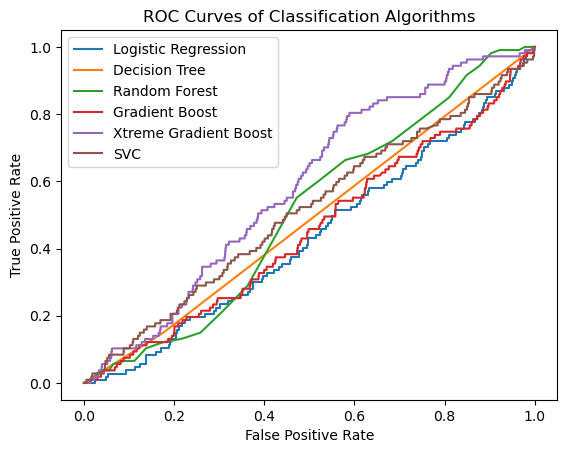

In [33]:
#plotting Roc_curve 
plt.figure() 
plt.plot(LR_fpr,LR_tpr,label = 'Logistic Regression') 
plt.plot(DT_fpr,DT_tpr,label = 'Decision Tree') 
plt.plot(RF_fpr,RF_tpr,label = 'Random Forest')
plt.plot(GB_fpr,GB_tpr,label = 'Gradient Boost')
plt.plot(XGB_fpr,XGB_tpr,label = 'Xtreme Gradient Boost')
plt.plot(svc_fpr,svc_tpr,label='SVC')
plt.title('ROC Curves of Classification Algorithms') 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.legend() 
plt.show()

## 8. Accuracies of Machine Learning Algorithms

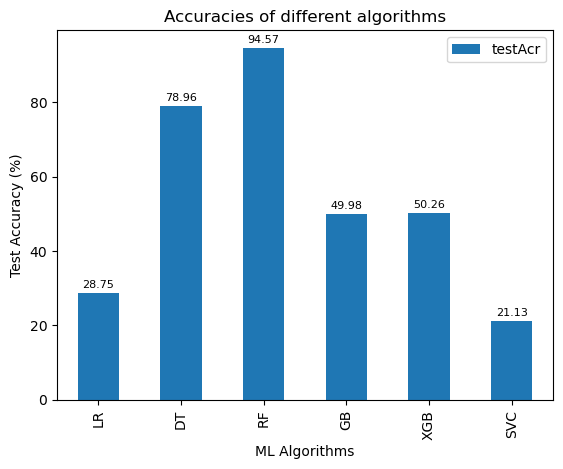

In [34]:
#Accuracy plot of Different Machine Learning methods 
dt = [['LR',trACC_LR*100,tesACC_LR*100],['DT',trACC_DT*100,tesACC_DT*100],['RF',trACC_RF*100,tesACC_RF*100],['GB',trACC_GB*100,tesACC_GB*100],['XGB',trACC_XGB*100,tesACC_XGB*100],['SVC',trACC_svc*100,tesACC_svc*100]] 
df = pd.DataFrame(dt, columns=['Name','trainAcr','testAcr']) 
plots = df.plot.bar(x='Name',y = 'testAcr',width = 0.5) 
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 6),
                   textcoords='offset points')
plt.title('Accuracies of different algorithms') 
plt.xlabel('ML Algorithms') 
plt.ylabel('Test Accuracy (%)') 
plt.show()